## GIOX TELECOMUNICACIONES <br>
### Análisis Exploratorio de Datos (EDA)

Luego de realizar el ETL para la empresa vamos a entender la estructura, patrones, relaciones y anomalías en los datos antes de realizar un modelado más avanzado, de tal forma que nos ayude a formular hipótesis y tomar decisiones sobre cómo tratar los datos.

En el ETL consolidamos la informacion en los siguiente archivos:
- **Penetracion_ph_at_vp**
Contiene la informacion relacionada de penetracion por poblacion y hogares, velocidades de conexion y accesos por tecnologia de telecomunicacion.

El siguiente es el contenido de la hojas del archivo denominado "internet"
*Acc_vel_loc_sinrangos con 18864 registros*
- **Velocidad_sin_Rangos con 18884 registros**
- **Accesos_tecnologia_localidad con 7753 registros**
- **Velocidad % por prov con 1008 registros**    
- **Totales VMD con 42 registros**
- **Totales Accesos Por Tecnología con 42**    
- **Accesos Por Tecnología con 1007 registros**
- **Penetración-poblacion con 1000 registros**
- **Penetracion-hogares con 1000 registros**
- **Penetracion-totales con 42 registros**
- **Totales Accesos por rango con 42 registros**
- **Accesos por rangos con 1000 registros**
- **Dial-Baf con 1992 registros**
- **Totales Dial-Baf con 42 registros**
- **Ingresos con 42 registros**

In [23]:
# Importamos la librerias necesarias para el analisis.
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

from sklearn.decomposition import PCA


In [24]:
# # Cargamos el Data Frame con el origen o fuente de los datos (archivo CSV), ojooo cambiar los archivos por CSV que son mas libianos
df_penetracion = pd.read_excel('8_Penetracion_PH_AT_VP.xlsx')
df_penetracion


,Año,Trimestre,Provincia,Accesos por cada 100 hab,Accesos por cada 100 hogares,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Mbps (Media de bajada)
0,2024,2,Buenos Aires,27.430000,79.840000,214055,2722466,1849476,138638,64745,4989380,157.410000
1,2024,2,Capital Federal,47.440000,116.370000,54102,1144781,230402,4493,29821,1463599,233.010000
2,2024,2,Catamarca,17.500000,68.810000,4951,10303,58355,1384,81,75074,97.380000
3,2024,2,Chaco,11.780000,44.060000,9448,57935,68944,8407,2358,147092,107.760000
4,2024,2,Chubut,26.460000,86.330000,25955,80704,26516,31118,9930,174223,21.670000
...,...,...,...,...,...,...,...,...,...,...,...,...
922,2014,1,La Rioja,4.353175,16.294105,15663,0,14,0,34,15711,2.964740
923,2014,1,Mendoza,8.933318,31.913123,148970,12076,2480,37,2282,165845,3.502681
924,2014,1,Misiones,6.323161,23.136539,56597,17191,4,150,8,73950,3.403126
925,2014,1,Neuquén,14.882266,49.791605,47790,28161,997,10381,3051,90380,3.549302


In [25]:
df_penetracion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 927 entries, 0 to 926
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Año                           927 non-null    int64  
 1   Trimestre                     927 non-null    int64  
 2   Provincia                     927 non-null    object 
 3   Accesos por cada 100 hab      927 non-null    float64
 4   Accesos por cada 100 hogares  927 non-null    float64
 5   ADSL                          927 non-null    int64  
 6   Cablemodem                    927 non-null    int64  
 7   Fibra óptica                  927 non-null    int64  
 8   Wireless                      927 non-null    int64  
 9   Otros                         927 non-null    int64  
 10  Total                         927 non-null    int64  
 11  Mbps (Media de bajada)        927 non-null    float64
dtypes: float64(3), int64(8), object(1)
memory usage: 87.0+ KB


### Paso 1:

**Analisis de informacion en el porcentaje de velocidad - Mbps (Media de bajada)**

A continuacion realizaremos un histograma para identificar la distribucion del conjunto de datos que corresponden a las velocidades de descarga de internet por provincia, año y trimestre. 

**Grafico Histograma**

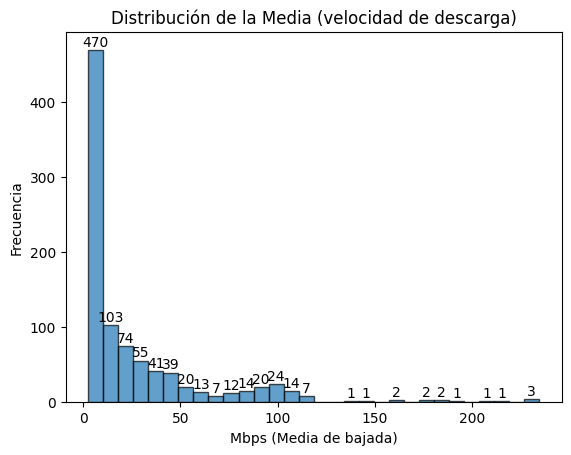

In [26]:
# Graficar el histograma usando plt.hist() directamente
counts, bin_edges, patches = plt.hist(df_penetracion['Mbps (Media de bajada)'], bins=30, edgecolor='black', alpha=0.7)

# Eliminar los bins con cero frecuencia
non_zero_bins = counts > 0
counts = counts[non_zero_bins]
bin_edges = bin_edges[:-1][non_zero_bins]  # Actualizamos los límites de los bins para que coincidan

# Añadir el título y las etiquetas
plt.title('Distribución de la Media (velocidad de descarga)')
plt.xlabel('Mbps (Media de bajada)')
plt.ylabel('Frecuencia')

# Añadir texto en cada barra del histograma
for count, x in zip(counts, bin_edges):
    # Se posiciona un texto cerca del centro de cada barra (bin)
    plt.text(x + (bin_edges[1] - bin_edges[0]) / 2, count + 1, str(int(count)), ha='center', va='bottom')

# Mostrar el gráfico
plt.show()

**Resultado**

El anterior grafico nos permite identificar que el mayor consumo de conexion para la poblacion, esta en velocidad de descargas mas bajas, situacion que obedece a factores del poder adquisitivo en los hogares, cobertura y tecnologia disponible.

A continuacion listamos por rangos de 10 en 10 mbps, para detallar aun mas la distribucion de la informacion de los porcentajes de velocidades en la descarga de informacion.

In [27]:
# Suponiendo que df es tu DataFrame y 'Ventas' es la columna que contiene las velocidades
# Definir los rangos de 10 Mbps
bins = list(range(0, int(df_penetracion['Mbps (Media de bajada)'].max()) + 10, 10))

# Etiquetas para los rangos (opcional, puedes personalizarlas)
labels = [f'{i}-{i+10} Mbps' for i in bins[:-1]]

# Crear una nueva columna con los rangos
df_penetracion['Rango_Ventas'] = pd.cut(df_penetracion['Mbps (Media de bajada)'], bins=bins, labels=labels, right=False)

# Ver el resultado
print(df_penetracion[['Mbps (Media de bajada)', 'Rango_Ventas']])

     Mbps (Media de bajada)  Rango_Ventas
0                157.410000  150-160 Mbps
1                233.010000  230-240 Mbps
2                 97.380000   90-100 Mbps
3                107.760000  100-110 Mbps
4                 21.670000    20-30 Mbps
..                      ...           ...
922                2.964740     0-10 Mbps
923                3.502681     0-10 Mbps
924                3.403126     0-10 Mbps
925                3.549302     0-10 Mbps
926                3.353796     0-10 Mbps

[927 rows x 2 columns]


**Grafico Dispersion**

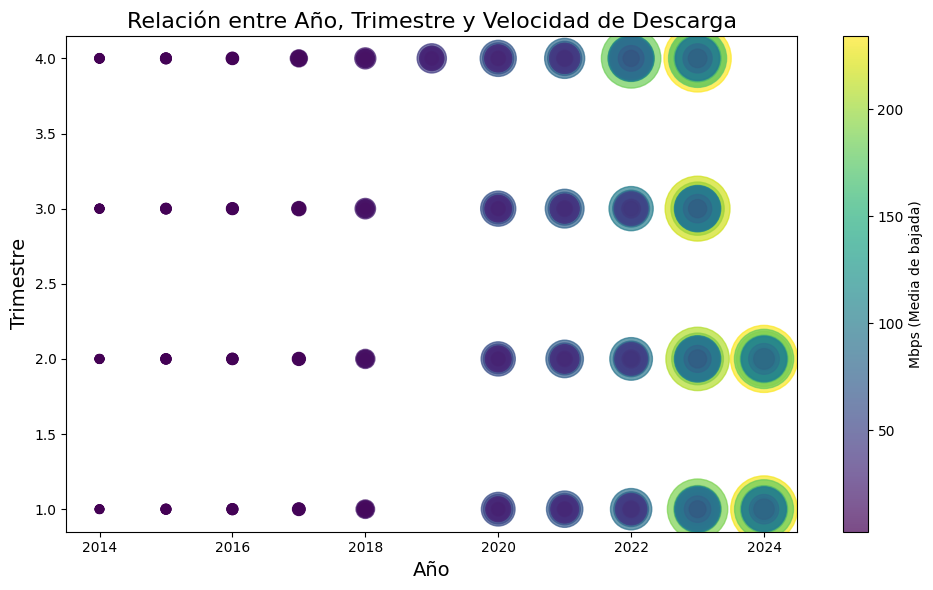

In [28]:
import matplotlib.pyplot as plt

# Usamos el tamaño de los puntos basado en 'Mbps (Media de bajada)'
# Escalamos los tamaños (multiplicamos por 10, puedes ajustar este valor)
sizes = df_penetracion['Mbps (Media de bajada)'] * 10  # Ajusta el factor de escala según lo necesites

plt.figure(figsize=(10, 6))

# Usamos 's=sizes' para controlar el tamaño de cada punto basado en 'Mbps (Media de bajada)'
scatter = plt.scatter(df_penetracion['Año'], df_penetracion['Trimestre'], 
                      c=df_penetracion['Mbps (Media de bajada)'], 
                      cmap='viridis',  # Mapa de colores (puedes elegir otro como 'plasma', 'inferno', etc.)
                      s=sizes,          # Tamaño de los puntos, basado en los valores de 'Mbps (Media de bajada)'
                      alpha=0.7)        # Transparencia para los puntos

# Añadir título y etiquetas de los ejes
plt.title('Relación entre Año, Trimestre y Velocidad de Descarga', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Trimestre', fontsize=14)

# Añadir barra de color para mostrar el mapeo de los valores de 'Mbps (Media de bajada)'
plt.colorbar(scatter, label='Mbps (Media de bajada)')

# Ajustar el diseño para que no se sobrepongan las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Resultado**

El gráfico nos permite observar que, a medida que pasa el tiempo, las velocidades de descarga de información en Internet se incrementan. Esto se debe a los cambios en la tecnología y la infraestructura de telecomunicaciones, indicando una mejora notablemente en la última década, reflejando las inversiones y avances en la ciencia de la transmision de datos.

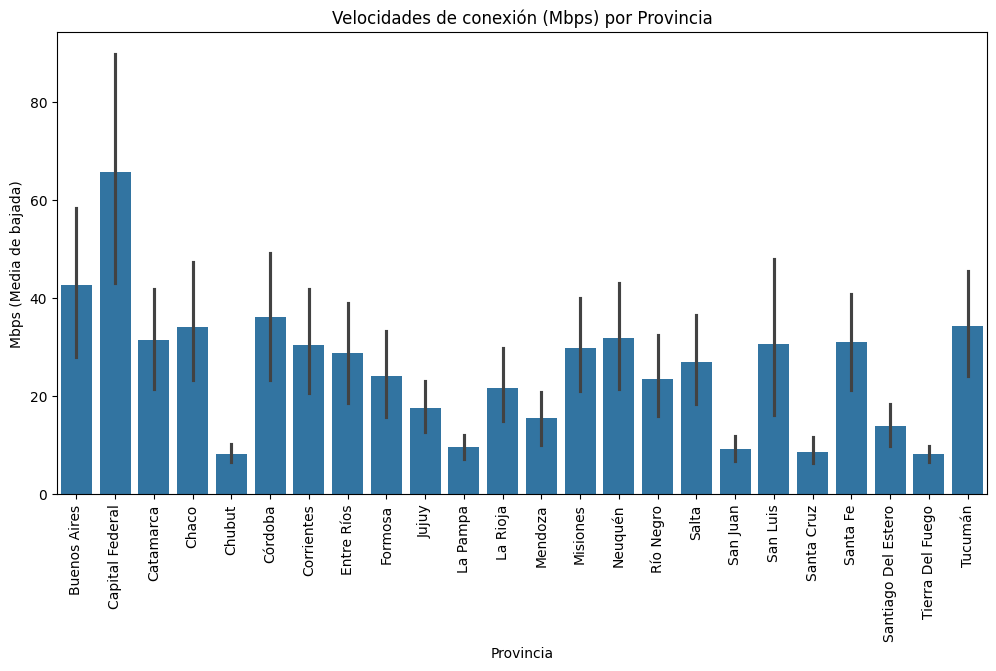

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# Suponiendo que tienes una columna 'Provincia' y 'Mbps (Media de bajada)'
plt.figure(figsize=(12, 6))
sns.barplot(x='Provincia', y='Mbps (Media de bajada)', data=df_penetracion)
plt.xticks(rotation=90)  # Rota las etiquetas si las provincias son muchas
plt.title('Velocidades de conexión (Mbps) por Provincia')
plt.xlabel('Provincia')
plt.ylabel('Mbps (Media de bajada)')
plt.show()

**Resultado**

El gráfico anterior muestra que la dispersión en las velocidades de conexión varía notablemente entre las provincias, siendo Capital Federal la que presenta la mayor variabilidad y provincias como Chubut y Formosa las que tienen velocidades más uniformes pero consistentemente bajas. Esto puede estar relacionado con la infraestructura y la distribución del servicio de Internet en cada provincia.

**Grafico de Lineas**

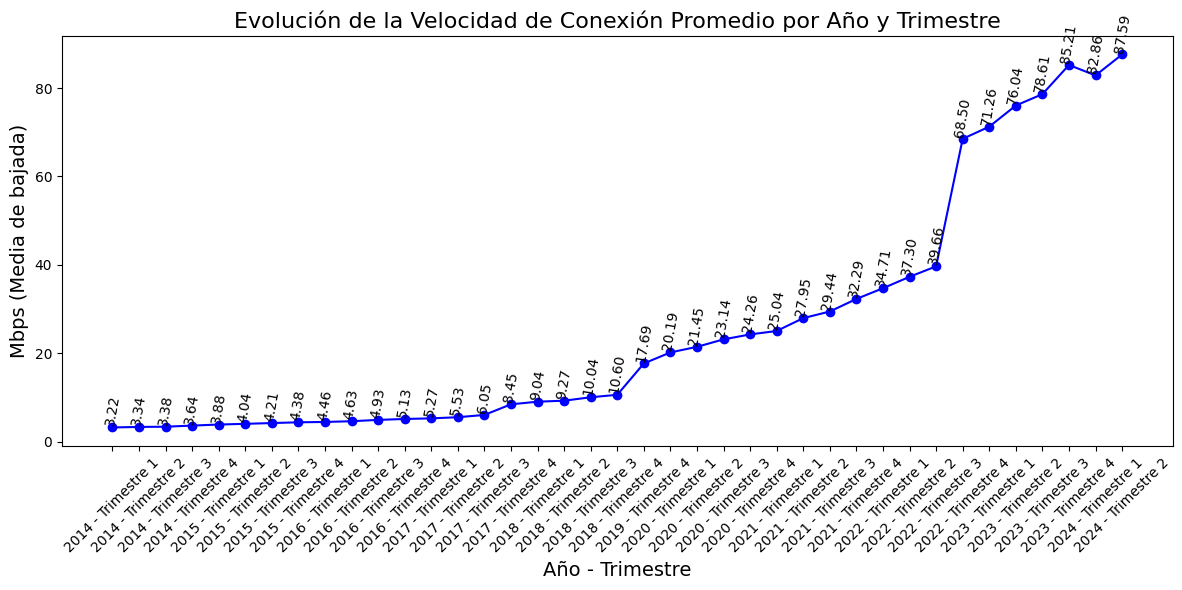

In [30]:
import matplotlib.pyplot as plt

# Crear una nueva columna 'Año - Trimestre' combinando el año y el trimestre
df_penetracion['Año - Trimestre'] = df_penetracion['Año'].astype(str) + ' - Trimestre ' + df_penetracion['Trimestre'].astype(str)

# Agrupar por 'Año - Trimestre' y calcular el promedio de la velocidad de descarga
df_grouped = df_penetracion.groupby('Año - Trimestre')['Mbps (Media de bajada)'].mean()

# Crear el gráfico de líneas
plt.figure(figsize=(12, 6))

# Graficar
plt.plot(df_grouped.index, df_grouped.values, marker='o', linestyle='-', color='b')

# Añadir etiquetas con los valores en cada punto, rotadas a 45 grados
for i, value in enumerate(df_grouped.values):
    plt.text(i, value + 0.1, f'{value:.2f}', ha='center', va='bottom', fontsize=10, color='black', rotation=80)

# Añadir etiquetas y título
plt.title('Evolución de la Velocidad de Conexión Promedio por Año y Trimestre', fontsize=16)
plt.xlabel('Año - Trimestre', fontsize=14)
plt.ylabel('Mbps (Media de bajada)', fontsize=14)

# Rotar las etiquetas del eje X para mejorar la visibilidad
plt.xticks(rotation=45)

# Ajustar el gráfico para que no se sobrepongan las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Resultado**

Esta linea de tiempo nos dice que, a medida que pasa el tiempo y sus avances en tecnologia, igual aumentan las velocidades de descarga y subida de informacion con la internet. 

C:\Users\Dalgy\AppData\Local\Temp\ipykernel_17836\228078215.py:18: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('tab20', len(provincias))  # Usamos 'tab20' para un buen set de colores


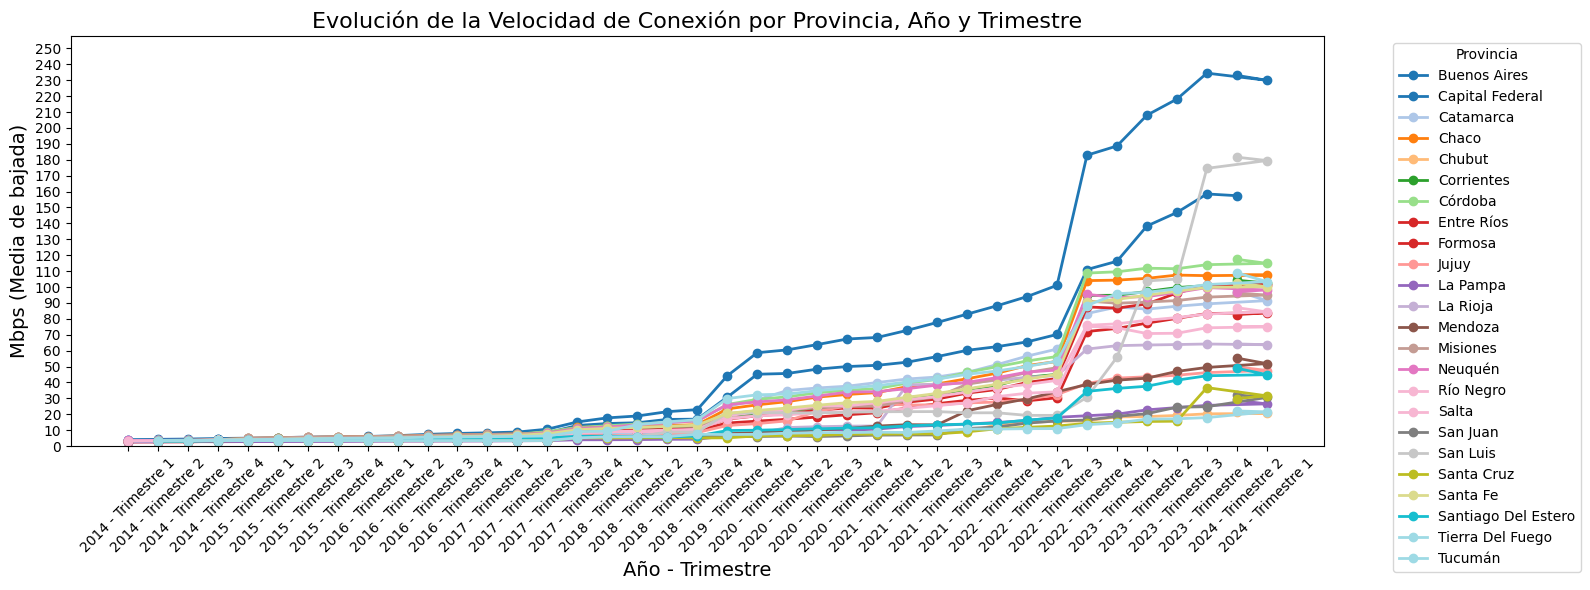

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Supongamos que df_combinado es el DataFrame con los datos.

# Crear una nueva columna 'Año - Trimestre' combinando Año y Trimestre
df_penetracion['Año - Trimestre'] = df_penetracion['Año'].astype(str) + ' - Trimestre ' + df_penetracion['Trimestre'].astype(str)

# Agrupar los datos por 'Año - Trimestre' y 'Provincia', y calcular la media de 'Mbps (Media de bajada)'
df_grouped = df_penetracion.groupby(['Año - Trimestre', 'Provincia'])['Mbps (Media de bajada)'].mean().reset_index()

# Crear un gráfico de líneas
plt.figure(figsize=(16, 6))

# Colores para cada provincia
provincias = df_grouped['Provincia'].unique()
colors = plt.cm.get_cmap('tab20', len(provincias))  # Usamos 'tab20' para un buen set de colores

# Graficar una línea por provincia
for idx, provincia in enumerate(provincias):
    provincia_data = df_grouped[df_grouped['Provincia'] == provincia]
    plt.plot(provincia_data['Año - Trimestre'], provincia_data['Mbps (Media de bajada)'], 
             label=provincia, marker='o', color=colors(idx), linestyle='-', linewidth=2)

# Añadir título y etiquetas de los ejes
plt.title('Evolución de la Velocidad de Conexión por Provincia, Año y Trimestre', fontsize=16)
plt.xlabel('Año - Trimestre', fontsize=14)
plt.ylabel('Mbps (Media de bajada)', fontsize=14)

# Ajustar el límite superior del eje Y para asegurarse de que el valor más alto se vea
# Obtenemos el valor máximo de 'Mbps (Media de bajada)' y aumentamos un poco el límite superior
max_value = df_grouped['Mbps (Media de bajada)'].max()
plt.ylim(0, max_value * 1.1)  # Ajustar el límite superior un 10% más que el valor máximo

# Ajustar los ticks del eje Y (por ejemplo, cada 10 Mbps)
ticks_y = np.arange(0, max_value * 1.1, 10)  # Los valores 0, 10, 20, ..., max_value * 1.1
plt.yticks(ticks_y)  # Establecer los ticks en el eje Y

# Añadir leyenda
plt.legend(title='Provincia', bbox_to_anchor=(1.05, 1), loc='upper left')

# Rotar las etiquetas del eje X para mejorar la visibilidad
plt.xticks(rotation=45)

# Ajustar el gráfico para que no se sobrepongan las etiquetas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Resultado**

En este segmente de analisis, observamos que las velocidades crecieron en los ultimos años de manera leve en las velocidades bajas, pero exponencialmente en velocidades altas, obedece como lo vemos en los graficos en las grandes ciudades, lo que le permite a las grandes empresas actualizar con facilidad su tecnologia y ser mas efeiciente en el servicio.

### Paso 2:

**Analisis de informacion en el acceso por cada 100 hogares**

A continuacion realizaremos un analisis de distribucion y densidad del conjunto de datos correpondiente al acceso de internet por cada 100 hogores, por provincia, año y trimestre.

**Grafico de Densidad**

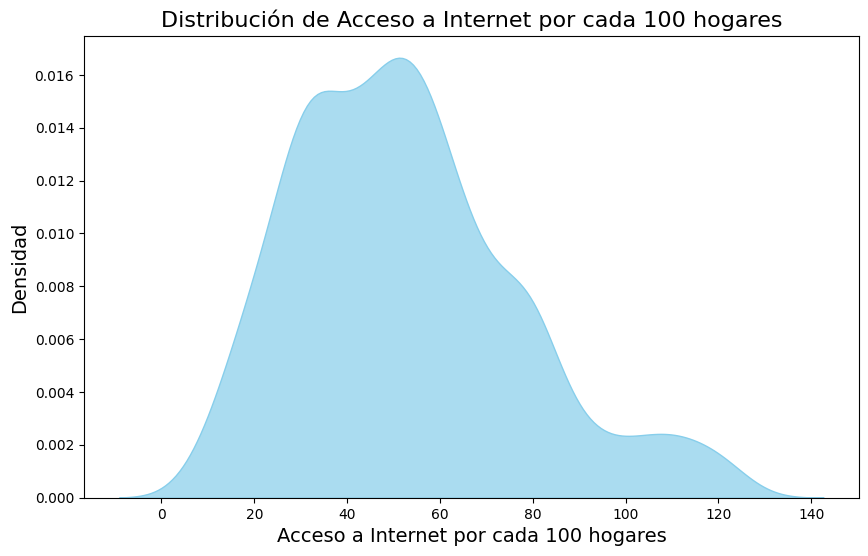

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Suponiendo que tienes un DataFrame llamado df que contiene la variable 'Acceso a internet por cada 100 personas'
# Generamos un gráfico de densidad para esa variable

plt.figure(figsize=(10, 6))

# Usamos seaborn para crear el gráfico de densidad
sns.kdeplot(df_penetracion['Accesos por cada 100 hogares'], fill=True, color='skyblue', alpha=0.7)

# Añadimos título y etiquetas
plt.title('Distribución de Acceso a Internet por cada 100 hogares', fontsize=16)
plt.xlabel('Acceso a Internet por cada 100 hogares', fontsize=14)
plt.ylabel('Densidad', fontsize=14)

# Mostrar el gráfico
plt.show()

**Resultado**

La gráfica de densidad muestra la distribución del acceso a internet por cada 100 hogares, la mayoría de las zonas tienen un acceso a internet moderado, pero existe una cola hacia la derecha que indica que algunas zonas tienen un acceso mucho mayor, la asimetría positiva indica que existen brechas digitales entre las diferentes zonas, con algunas teniendo un acceso significativamente menor.
La gráfica revela una heterogeneidad en el acceso a internet, con una tendencia hacia la concentración en valores medios pero con la presencia de desigualdades. Esto sugiere que existen zonas con mayor y menor acceso, lo que podría estar relacionado con factores socioeconómicos y geográficos.

**Grafico de Distribucion**

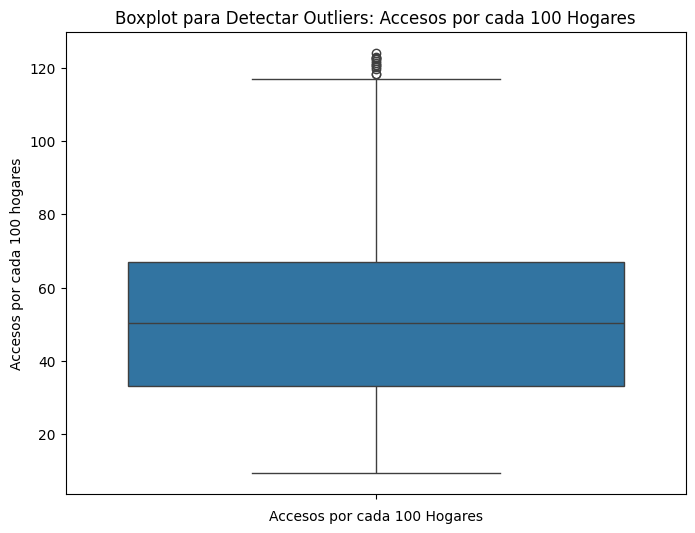

In [33]:

# Supongamos que la columna con los accesos por cada 100 hogares se llama 'Accesos_por_100_hogares'
accesos_por_100_hogares = df_penetracion['Accesos por cada 100 hogares']

# Crear el boxplot para detectar outliers
plt.figure(figsize=(8, 6))
sns.boxplot(data=accesos_por_100_hogares)

# Agregar título y etiquetas
plt.title("Boxplot para Detectar Outliers: Accesos por cada 100 Hogares")
plt.xlabel("Accesos por cada 100 Hogares")

# Mostrar el gráfico
plt.show()

**Resultado**

El boxplot nos muestra cómo se distribuyen los accesos a internet por cada 100 hogares. La mayoría de los hogares tienen un número similar de accesos, pero hay un caso muy particular (un outlier) donde el número de accesos es mucho mayor. Esto sugiere que existe una gran igualdad en el acceso a internet, pero también hay excepciones, generalmente pasa por la demografia de las ciudades con mayor poblacion, tambien por el uso de tecnologias con mayores beneficios.

### Paso 3:

**Analisis de informacion en el acceso por cada 100 habitantes**

A continuacion realizaremos un analisis de distribucion y densidad del conjunto de datos correpondiente al acceso de internet por cada 100 habitantes, por provincia, año y trimestre.

**Grafico de Dispersion**

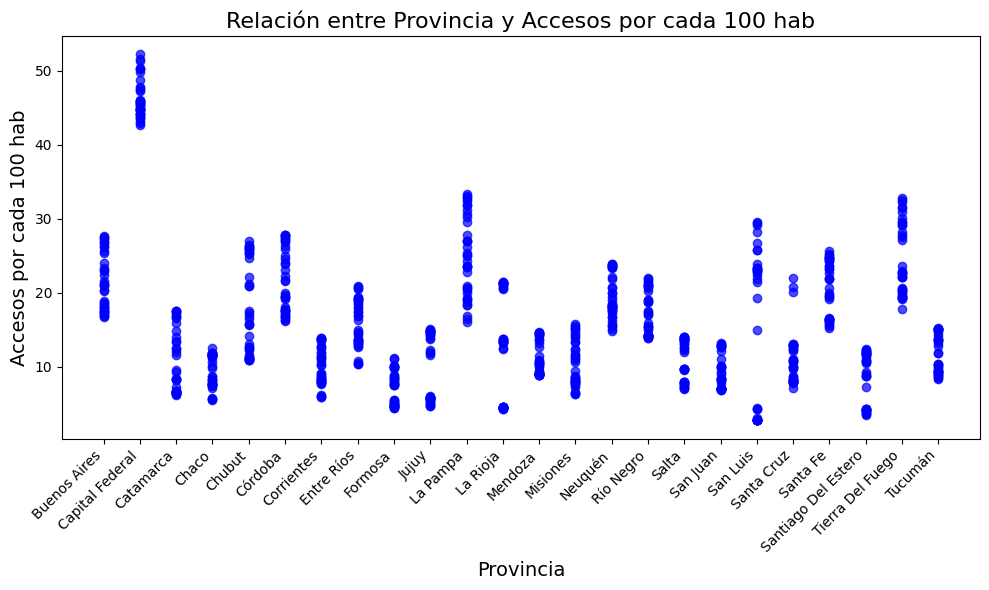

In [34]:
import matplotlib.pyplot as plt

# Crear el gráfico de dispersión
plt.figure(figsize=(10, 6))

# Graficar los puntos de dispersión
plt.scatter(df_penetracion['Provincia'], df_penetracion['Accesos por cada 100 hab'], color='blue', alpha=0.7)

# Añadir título y etiquetas
plt.title('Relación entre Provincia y Accesos por cada 100 hab', fontsize=16)
plt.xlabel('Provincia', fontsize=14)
plt.ylabel('Accesos por cada 100 hab', fontsize=14)

# Rotar las etiquetas del eje X para que no se sobrepongan
plt.xticks(rotation=45, ha='right')  # Rotar 45 grados, alinear a la derecha

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()

# Mostrar el gráfico
plt.show()

**Resultado**

La dispersión de los datos sugiere que existe una desigualdad en el acceso a internet entre las diferentes provincias. Algunas provincias tienen un acceso mucho mayor que otras, Esta desigualdad puede estar influenciada por diversos factores, como el nivel de desarrollo económico de cada provincia, la infraestructura de telecomunicaciones, políticas gubernamentales, densidad poblacional, entre otros.

**Grafico de Distribucio**

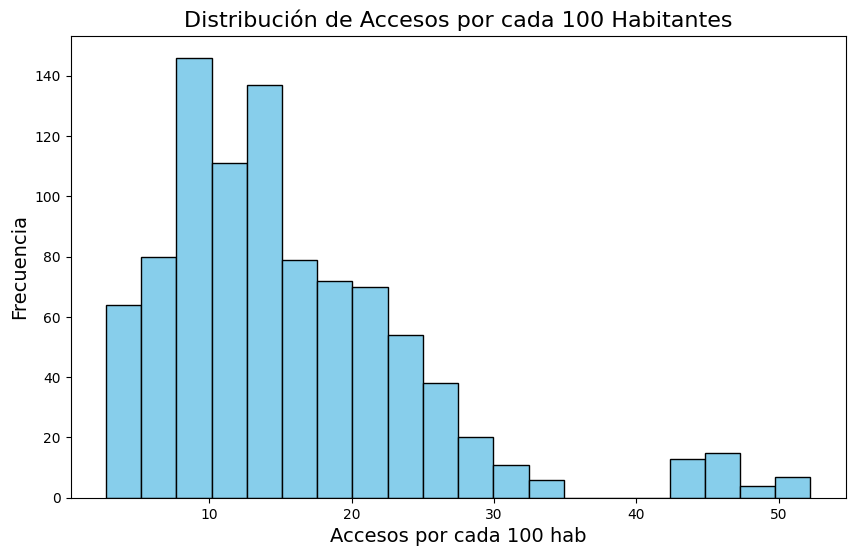

In [35]:
import matplotlib.pyplot as plt

# Crear el histograma
plt.figure(figsize=(10, 6))
plt.hist(df_penetracion['Accesos por cada 100 hab'], bins=20, color='skyblue', edgecolor='black')

# Añadir título y etiquetas
plt.title('Distribución de Accesos por cada 100 Habitantes', fontsize=16)
plt.xlabel('Accesos por cada 100 hab', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el gráfico
plt.show()

**Resultado**

La distribución asimétrica y la concentración en valores bajos sugieren que existe una desigualdad en el acceso a internet, en donde un gran número de localidades tiene un acceso limitado, mientras que un número menor tiene un acceso más amplio, los resultados sugieren que se requieren políticas públicas específicas para mejorar el acceso a internet en aquellas localidades con menor conectividad.
Existe una brecha digital significativa, con muchas localidades teniendo un acceso limitado, lo plantea estrategias para reducir esta desigualdad y garantizar un acceso equitativo a internet para todos.

### Paso 4:

**Analisis de informacion en el acceso a tecnologias**

A continuacion realizaremos un analisis correpondiente al acceso de internet por algunas de la tecnologias presentes y usadas aun en el Pais, por provincia, año y trimestre.

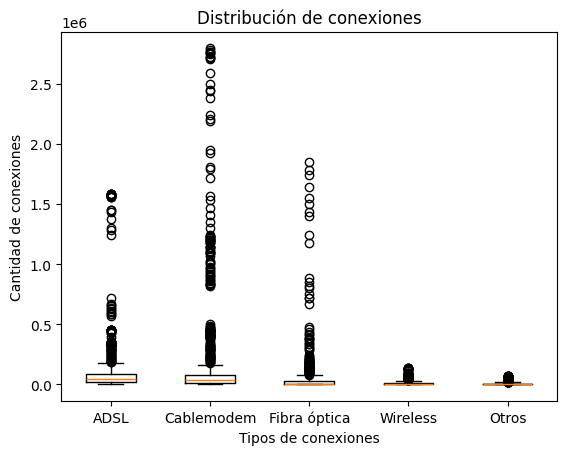

In [36]:
# De forma gráfica:
columnas = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
plt.boxplot(df_penetracion[columnas])
plt.ylabel('Cantidad de conexiones')
plt.xlabel('Tipos de conexiones')
plt.title('Distribución de conexiones')
plt.xticks(range(1, len(columnas) + 1), columnas)
plt.show()

El diagrama sugiere que la fibra óptica se ha posicionado como la tecnología dominante en términos de cantidad de conexiones, la fibra optica, resenta la mediana más alta, lo que indica que, en promedio, tiene más conexiones que las otras tecnologías. También tiene una mayor variabilidad, con algunos valores atípicos muy altos, a su vez el cablemóde Ocupa el segundo lugar en términos de mediana, pero también presenta una alta variabilidad, por su parte ADSL, Wireless y Otros tienen una cantidad de conexiones significativamente menor en comparación con la fibra óptica y el cablemódem. Tiene sentido pues desde hace varios años la fibra optica ha ampliado su cobertura, en parte y como sucede en varias paises de Latinoamerica el cobre es rabado por organizaciones al margen de la ley.

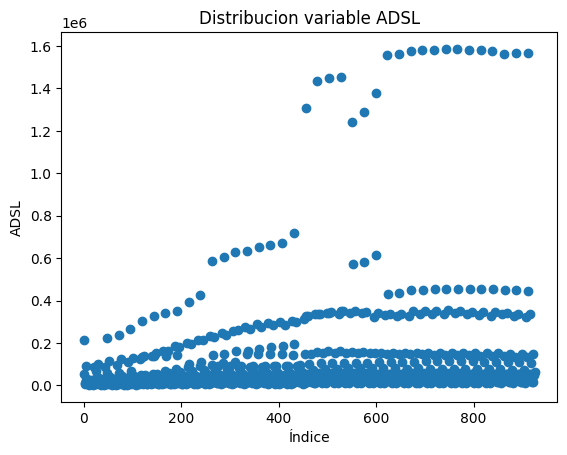

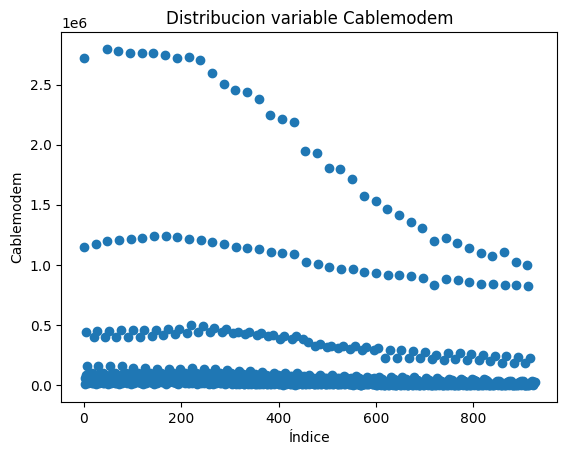

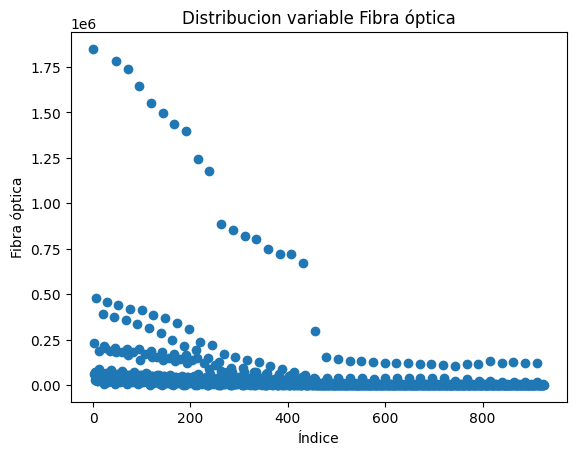

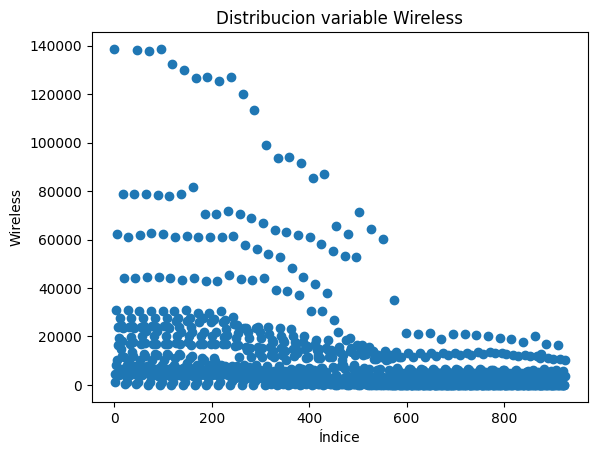

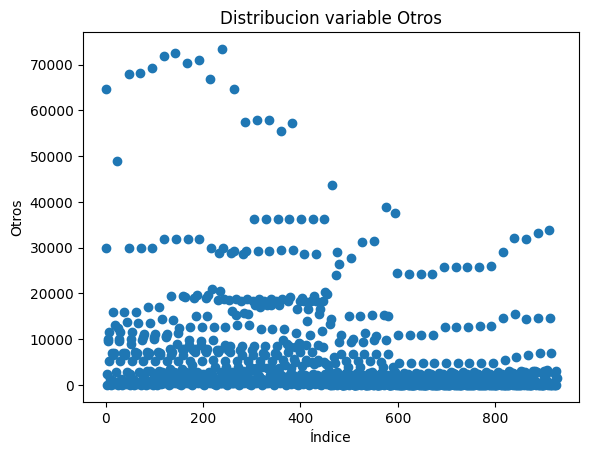

In [38]:
# Agrupamos las columnas concernientes a los accesos en la poblacion de acuerdo a la tecnologia disponible
columnas = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

# Generamos los graficos de dispersion para cada una de las tecnolgias
for columna in columnas:
    plt.scatter(range(len(df_penetracion)), df_penetracion[columna])
    plt.xlabel('Índice')
    plt.ylabel(columna)
    plt.title(f'Distribucion variable {columna}')
    plt.show()

En sistesis, los graficos anteriores de dispersion nos muestras valores poco concentrados lo que indica que hay valores muy altos en comparacion a los comunes, como lo digimos en otras ocasiones los valores mas altos de acceso a estas tecnologias estan en las ciudades intermedias o grandes del Pais.

***Observacion General***

La parte de informacion analizada sobre el acceso a internet y velocidades en Mbps, es consistente con la realidad economica, social y tecnologica de un Pais, en donde, las poblaciones mas pequenas y alejadas de las ciudades grandes e intermedias, tienen menos posiblidad de acceder a las mismas condiciones de servicios que los hogares y poblaciones con alta concentracion demografica, de igual forma pasa con la velocidad pues para los operadores es mas facil actualizar la tecnologia en donde hay mayor consumo y ganancias economicas que lo permiten, la inversion publica es quien deberia en comun acuerdo con el sector privado para ampliar la cobertura y cambiar la tecnologia, de las poblaciones menos favorecidas.

**Nota:** Hoy la tecnologia acorta las distancias y amplian sus autopistas de comunicacion para prestar varios servicios (Televisio, Radio, Voz, Datos, Video, telefonia ip entre otros) por una sola via.

